<a href="https://colab.research.google.com/github/wldud01/BoostCourse-DataScience/blob/main/Course2_Analysis_Seoul_hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## boost course -data science school
- 강의 2일차
- 서울 종합 병원 분포 확인하기
- 공공 데이터 활용

### 주제

- 서울 종합 병원 분포 확인하기
   - 주어진 가설 - **서울 종합 병원은 고르게 분포되어 있는가?**
- 가상의 문제 설정 해보기
    - 서울 종합 병원 분포를 확인 해야 하는 상황 역으로 생각하기
      - 새로운 종합 병원이 어떤 지역에 필요할까?
        - 환자가 많은 지역
          - 서울 지역 별로 존재하는 종합 병원에 입원 환자 수
        - 사망자가 많은 지역
          - 서울 지역 별 사망자 수 최근 5년 평균
          - 사망 주요 원인 5가지 키워드
        - 응급차가 몰리는 지역
          - 응급차 최근 5년간 출동 지역 분포도
          - 몰리는 지역과 종합병원 분포 비교
        - 가까운 종합병원이 없는 지역
          - 서울 종합병원 분포도** "주어진 가설에 해당 하는 부분"**
          - 그렇다면 왜 종합병원이 없지?
            - 서울 종합 병원이 위치하는 공통적인 특성이 뭘까?
              - 상권이 좋은가? - 상권 분포도 파악
              - 역 주변인가? - 역 위치와의 선형 관계
              - 집값이 싼가? - 위치하는 지역 집값간의 선형 관계 파악
              - 사람이 밀집된 곳인가? - 인구 밀도 확인 및 선형 관계 파악
            - 서울 종합 병원이 없는 지역의 공통적인 특성이 뭘까?
        - 그외(무결성 확보)
        

### 데이터 가져오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache-fv
!rm ~/.cache/matplotlib -rf

In [2]:
import matplotlib.pyplot as plt
# window 한글 폰트 설정
plt.rc('font', family = 'NanumBarunGothic')
# 그래프가 노트북에 보이도록 설정
plt.rc('axes', unicode_minus =False)
%matplotlib inline

In [3]:
import glob

data ="./drive/MyDrive/Boostcourse_data_science/data/*.csv"
data_list= glob.glob(data)

In [4]:
df_hospital = pd.read_csv(data_list[0])

<ipython-input-4-e46132328eb7>:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_hospital = pd.read_csv(data_list[0])


In [5]:
class Df_info:

  _object = pd.DataFrame()
  _continuous = pd.DataFrame()
  na = False
  def kind_of_data(self,df):
    # df 열
    df_col = df.columns
    for i in range(0, len(df_col)):
      if (df[df_col[i]].dtypes == 'O')*1 == 1:
        if df[df[df_col[i]].isna()].shape[0] > 0: self.na = True
        self._object[df_col[i]] = df[df_col[i]]
      elif (df[df_col[i]].dtypes == "float")*1 ==1 or (df[df_col[i]].dtypes == "int")*1 ==1:
        if df[df[df_col[i]].isna()].shape[0] > 0: self.na =  True
        self._continuous[df_col[i]] = df[df_col[i]]

    return self._object, self._continuous

  def _info(self,df):
    print("<<<< DATA INFORMATION >>>>")
    print("(row , col):", df.shape)
    print("________________________________________________")
    print("file information", df.info())
    print("_______________________________________________")
    print(f"컬럼 {df.shape[1]}개")
    print(f"결측치 여부는 {self.na}")

data = Df_info()
# 범주형 자료와 수치형 자료 나누기
category, continuous = data.kind_of_data(df_hospital)
print(data._info(df_hospital))

<<<< DATA INFORMATION >>>>
(row , col): (91335, 39)
________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null

- 숫자가 일정하지 않음
  - 결측치가 있음을 예상할 수 있다


In [6]:
continuous.head()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
0,19956873,41.0,41273.0,4127360000,4.127311e+09,4127310900210810000,1,1081,NaN,412733191011,10,NaN,425764.0,15236.0,126.814295,37.336344
1,20024149,11.0,11680.0,1168065600,1.168012e+09,1168011800204670014,1,467,14.0,116804166604,39,NaN,135270.0,6292.0,127.053198,37.488742
2,20152277,41.0,41390.0,4139059100,4.139013e+09,4139013200217400001,1,1740,1.0,413903199049,178,NaN,429450.0,15066.0,126.734841,37.344955
3,20350610,26.0,26500.0,2650078000,2.650010e+09,2650010400200740001,1,74,1.0,265003131037,688,NaN,613100.0,48266.0,129.115438,35.166872
4,20364049,41.0,41465.0,4146551000,4.146510e+09,4146510100207120002,1,712,2.0,414653205024,32,NaN,448170.0,16837.0,127.095522,37.323528


In [7]:
df_hospital.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4.0,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955
3,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100.0,48266.0,NaN,5.0,NaN,129.115438,35.166872
4,20364049,더블유스토어수지점,수지점,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,4146510100107120002026238,NaN,경기도 용인시 수지구 문정로 32,448170.0,16837.0,NaN,1.0,NaN,127.095522,37.323528


In [8]:
# tail로 뒤에 데이터 불러오기
df_hospital.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
91330,16196725,온누리약국,베스트,S,의료,S02,약국/한약방,S02A01,약국,G47811,...,3017011200115070000021096,NaN,대전광역시 서구 문예로 67,302831.0,35240.0,NaN,NaN,NaN,127.389865,36.352728
91331,16192180,리원,봄산후조,S,의료,S07,의료관련서비스업,S07A07,산후조리원,S96993,...,4128112300111460000011715,청한프라자,경기도 고양시 덕양구 성신로 14,412827.0,10503.0,NaN,NaN,NaN,126.830144,37.627530
91332,16127538,참좋은요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2641010800105380001005572,한신시티빌,부산광역시 금정구 금강로 209,609841.0,46294.0,NaN,2,NaN,129.082790,35.227138
91333,16108681,경희중앙한의원,NaN,S,의료,S01,병원,S01B06,한의원,Q86203,...,1174010500103450009002392,NaN,서울특별시 강동구 천중로 213,134811.0,5303.0,NaN,NaN,NaN,127.143958,37.540993
91334,16109073,천안김안과천안역본점의원,NaN,S,의료,S01,병원,S01B13,안과의원,Q86201,...,4413110700102660017016314,김안과,충청남도 천안시 동남구 중앙로 92,330952.0,31127.0,NaN,NaN,NaN,127.152651,36.806640


In [9]:
# 업체 종류 수 - 56910 개
df_hospital['상호명'].nunique()

56910

### 결측치 다루기
- isnull().sum()

- plot()/plot.bar()/plot.harh()

- reset_index

- sort_values()

- NaN

- drop()

In [10]:
# 열의 null의 갯수
null_count=df_hospital.isnull().sum()

<Axes: >

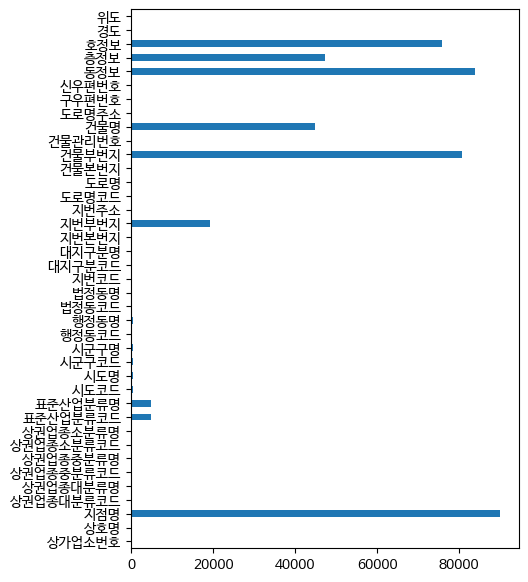

In [11]:
# 시각화
null_count.plot.barh(figsize=(5,7))

In [12]:
# reset_index
# 결측치 수를 index로 만들어준다
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [13]:
# 컬럼명 바꾸기
df_null_count.columns = ["컬럼명","결측치수"]
df_null_count.head()

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [14]:
# 결측치 수 순으로 정렬하기 내림 차순
df_null_count_top = df_null_count.sort_values(by=['컬럼명'],ascending =False).head(10)

In [15]:
# 특정 컬럼만 불러오기
# NaN - not a number
df_hospital["지점명"]

0         NaN
1         NaN
2         NaN
3         NaN
4         수지점
         ... 
91330     베스트
91331    봄산후조
91332     NaN
91333     NaN
91334     NaN
Name: 지점명, Length: 91335, dtype: object

In [16]:
drop_col = df_null_count_top['컬럼명'].values.tolist()
drop_col

['호정보',
 '행정동코드',
 '행정동명',
 '표준산업분류코드',
 '표준산업분류명',
 '층정보',
 '지점명',
 '지번코드',
 '지번주소',
 '지번부번지']

In [17]:
# 결측치 많은 top columns 제거
df_hos_drop = df_hospital.drop(drop_col,axis =1)

In [18]:
print(df_hospital.shape)
df_hos_drop.shape

(91335, 39)


(91335, 29)

In [19]:
data._info(df_hos_drop)

<<<< DATA INFORMATION >>>>
(row , col): (91335, 29)
________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   상권업종대분류코드  91335 non-null  object 
 3   상권업종대분류명   91335 non-null  object 
 4   상권업종중분류코드  91335 non-null  object 
 5   상권업종중분류명   91335 non-null  object 
 6   상권업종소분류코드  91335 non-null  object 
 7   상권업종소분류명   91335 non-null  object 
 8   시도코드       90956 non-null  float64
 9   시도명        90956 non-null  object 
 10  시군구코드      90956 non-null  float64
 11  시군구명       90956 non-null  object 
 12  법정동코드      91280 non-null  float64
 13  법정동명       91280 non-null  object 
 14  대지구분코드     91335 non-null  int64  
 15  대지구분명      91335 non-null  object 
 16  지번본번지      91335 non-null  int64  
 17  도로명코드      91335 non-null

### Data Summary
- 기초 통계로 데이터의 분포를 살펴보고 시각화하기
- mean
- median
- max
- min
- count
- describe

In [20]:
# 데이터 요약 모듈 만들어 보기
# 기초 통계 수
def data_summary(df):
  print("<< Data Summmary >>")
  print("columns 별 수치 데이터 요약")
  print(f"_____________________________________________")

  df_column = df.columns
  for i in range(len(df_column)):
    if (df[df_column[i]].dtypes== 'int')*1==1 or (df[df_column[i]].dtypes== 'float')*1==1:
      print(f"columns명: {df_column[i]}")
      print(f"평균:      {df[df_column[i]].mean()}")
      print(f"표준편차:  {df[df_column[i]].std()}")
      print(f"중위수:    {df[df_column[i]].median()}")
      print(f"최대값:    {df[df_column[i]].max()}")
      print(f"최소값:    {df[df_column[i]].min()}")
      print(f"개수:      {df[df_column[i]].count()}")
      print("")
      print(f"평균-표준편차: {df[df_column[i]].mean()-df[df_column[i]].std()}")
      if df[df_column[i]].mean() > df[df_column[i]].median():
        print(f"중위수 < 평균")
      else: print(f"중위수 > 평균")
      print(f"_____________________________________________")

data_summary(df_hos_drop)

<< Data Summmary >>
columns 별 수치 데이터 요약
_____________________________________________
columns명: 상가업소번호
평균:      21218180.559435047
표준편차:  5042828.147111981
중위수:    22119005.0
최대값:    28524703
최소값:    2901108
개수:      91335

평균-표준편차: 16175352.412323065
중위수 > 평균
_____________________________________________
columns명: 시도코드
평균:      32.58671225647566
표준편차:  13.045137615946347
중위수:    41.0
최대값:    50.0
최소값:    11.0
개수:      90956

평균-표준편차: 19.541574640529312
중위수 > 평균
_____________________________________________
columns명: 시군구코드
평균:      32898.38187695149
표준편차:  12985.393171023228
중위수:    41117.0
최대값:    50130.0
최소값:    11110.0
개수:      90956

평균-표준편차: 19912.988705928263
중위수 > 평균
_____________________________________________
columns명: 법정동코드
평균:      3293384644.3064637
표준편차:  1297706281.227762
중위수:    4111710500.0
최대값:    5013032026.0
최소값:    1111010200.0
개수:      91280

평균-표준편차: 1995678363.0787017
중위수 > 평균
_____________________________________________
columns명: 대지구분코드
평균:      1.001335742048

In [21]:
df_hos_drop.dtypes.head()

상가업소번호        int64
상호명          object
상권업종대분류코드    object
상권업종대분류명     object
상권업종중분류코드    object
dtype: object

In [22]:
df_hos_drop.describe()

,상가업소번호,시도코드,시군구코드,법정동코드,대지구분코드,지번본번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,9.133500e+04,90956.000000,90956.000000,9.128000e+04,91335.000000,91335.000000,9.133500e+04,91335.000000,10604.000000,91323.000000,91333.00000,91335.000000,91335.000000
mean,2.121818e+07,32.586712,32898.381877,3.293385e+09,1.001336,587.534549,3.293207e+11,251.200482,7.241135,428432.911085,28085.47698,127.487524,36.624711
std,5.042828e+06,13.045138,12985.393171,1.297706e+09,0.036524,582.519364,1.297391e+11,477.456487,12.426816,193292.339066,18909.01455,0.842877,1.041361
min,2.901108e+06,11.000000,11110.000000,1.111010e+09,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.00000,124.717632,33.219290
25%,2.001931e+07,26.000000,26350.000000,2.635011e+09,1.000000,162.000000,2.635042e+11,29.000000,1.000000,302120.000000,11681.00000,126.914297,35.811830
50%,2.211900e+07,41.000000,41117.000000,4.111710e+09,1.000000,462.000000,4.111743e+11,92.000000,2.000000,440300.000000,24353.00000,127.084550,37.234652
75%,2.480984e+07,43.000000,43113.000000,4.311311e+09,1.000000,858.000000,4.311332e+11,257.000000,9.000000,602811.000000,46044.00000,128.108919,37.507463
max,2.852470e+07,50.000000,50130.000000,5.013032e+09,2.000000,7338.000000,5.013049e+11,8795.000000,244.000000,799801.000000,63643.00000,130.909912,38.499659


In [23]:
df_hos_drop[["위도","경도"]].describe()

,위도,경도
count,91335.000000,91335.000000
mean,36.624711,127.487524
std,1.041361,0.842877
min,33.219290,124.717632
25%,35.811830,126.914297
50%,37.234652,127.084550
75%,37.507463,128.108919
max,38.499659,130.909912


In [24]:
# 문자형 데이터 요약
df_hos_drop.describe(include="object")

,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구명,법정동명,대지구분명,도로명,건물관리번호,건물명,도로명주소,동정보
count,91335,91335,91335,91335,91335,91335,91335,90956,90956,91280,91335,91335,91335,46453,91335,7406
unique,56910,1,1,5,5,34,34,17,228,2822,2,16610,54142,17946,54031,556
top,리원,S,의료,S01,병원,S02A01,약국,경기도,서구,중동,대지,서울특별시 강남구 강남대로,1123010300109650001031604,현대아파트,서울특별시 동대문구 약령중앙로8길 10,1
freq,152,91335,91335,60774,60774,18964,18964,21374,3165,874,91213,326,198,131,198,1571


### 3.5 문자열 데이터 요약하기 - pandas 로 시각화 하기
- 기초 통계로 데이터의 분포를 살펴보고 시각화한
- unique() / nunique()
- value_counts()
- barh()/pie chart()

In [25]:
# 중복을 값 보기
df_hos_drop['상권업종대분류명'].unique()

array(['의료'], dtype=object)

In [27]:
# unique값 갯수
df_hos_drop['상권업종대분류명'].nunique()

1

In [26]:
df_hos_drop['상권업종중분류명'].nunique()

5

In [27]:
# 그룹화된 요약값
# normalize를 하면 비율을 알 수 있다
city = df_hos_drop['시도명'].value_counts(normalize = True)

<Axes: >

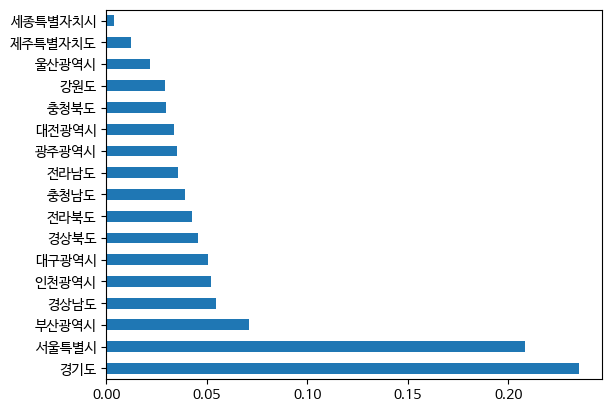

In [30]:
# 가로 막대 그래
city.plot.barh()

<Axes: ylabel='시도명'>

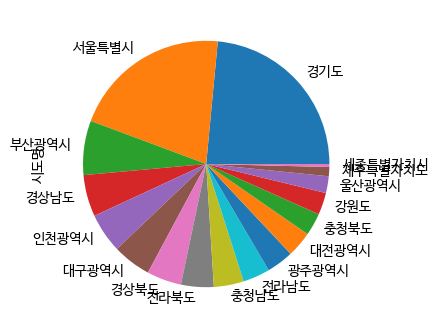

In [32]:
# 파이 차트는 오해의 소지가 많아서 권장하는 차트는 아니다.
city.plot.pie(figsize=(4,4))

<Axes: xlabel='count', ylabel='시도명'>

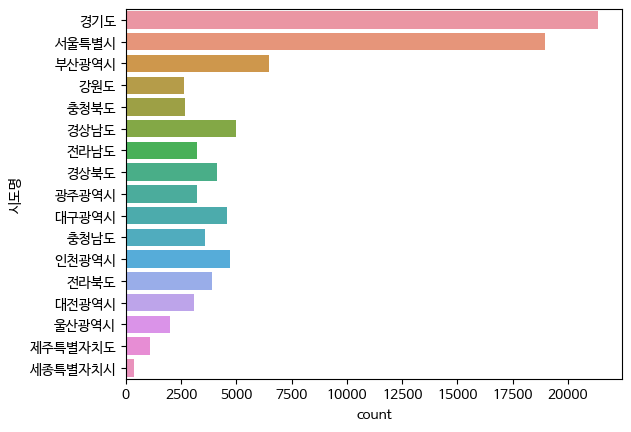

In [33]:
sns.countplot(data=df_hos_drop, y= "시도명")